In [1]:
import os
from pathlib import Path

from PIL import Image

from fastbook import *

In [2]:
images_dir = Path('images')
winnie_pooh_dir = images_dir / 'winnie_the_pooh'
vinnie_pookh_dir = images_dir / 'vinnie_pookh'

In [3]:
fns = get_image_files(images_dir)

In [4]:
fns

(#224) [Path('images/vinnie_pookh/1.1400x0.jpg'),Path('images/vinnie_pookh/1.180803-winkelman-soviet-winnie-the-pooh-films-hero_ctwmwx.jpg'),Path('images/vinnie_pookh/10.718179_1_win_big.jpg'),Path('images/vinnie_pookh/10.hqdefault.jpg'),Path('images/vinnie_pookh/11.136388_original-e1449764256789.jpg'),Path('images/vinnie_pookh/11.51jkag-zhml._sx331_bo1,204,203,200_.jpg'),Path('images/vinnie_pookh/12.096.jpg'),Path('images/vinnie_pookh/12.7d1a649611a714e3e1dd8d95d0239d.jpg'),Path('images/vinnie_pookh/13.3_d58e6fae.jpg'),Path('images/vinnie_pookh/14.pesenka-vinni-puha.jpg')...]

In [5]:
verify_images(fns)

(#0) []

In [6]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [7]:
dls = bears.dataloaders(images_dir)

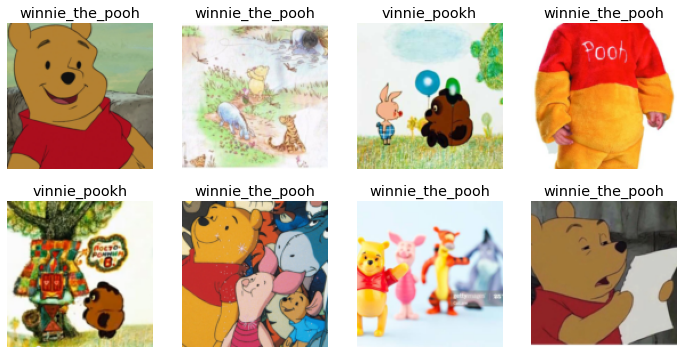

In [8]:
dls.valid.show_batch(max_n=8, nrows=2)

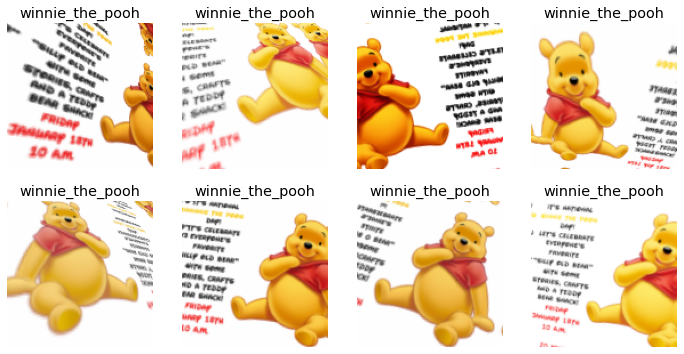

In [9]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(images_dir)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [10]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(images_dir)

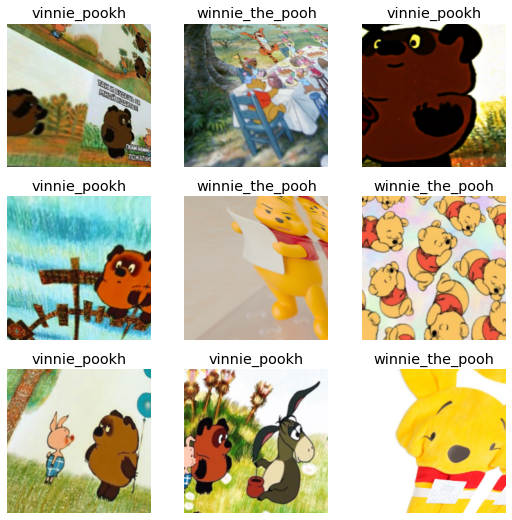

In [11]:
dls.show_batch()

In [12]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

In [13]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.424315,1.892278,0.545455,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.813355,1.234185,0.500000,00:04
1,0.686835,0.744737,0.272727,00:04
2,0.571919,0.382102,0.181818,00:05
3,0.505386,0.221703,0.136364,00:04
4,0.425924,0.122869,0.045455,00:04
5,0.367191,0.077219,0.068182,00:04
6,0.339320,0.062327,0.045455,00:05
7,0.296112,0.040291,0.000000,00:04
8,0.274939,0.031852,0.000000,00:04
9,0.251827,0.027639,0.000000,00:04


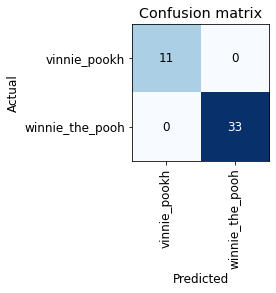

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

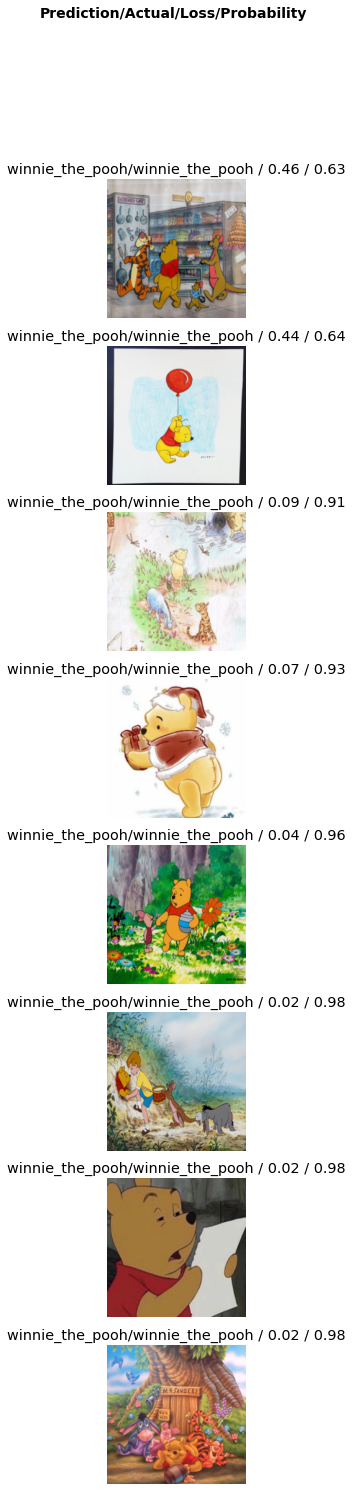

In [15]:
interp.plot_top_losses(8, nrows=8)